In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [58]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.backend import set_image_data_format 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input 
from tensorflow.keras import optimizers, losses, utils 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
data = ImageDataGenerator(rescale = 1./255, validation_split=0.15)

In [56]:
training = data.flow_from_directory(directory = "data/",
                                   target_size = (64,64),
                                   color_mode="rgb",
                                   class_mode = "categorical",
                                   batch_size = 256,
                                   subset='training',
                                   seed=117)

Found 22950 images belonging to 10 classes.


In [57]:
validation = data.flow_from_directory(directory = "data/",
                                   target_size = (64,64),
                                   color_mode="rgb",
                                   class_mode = "categorical",
                                   batch_size = 256,
                                   subset='validation',
                                   seed=117)

Found 4050 images belonging to 10 classes.


In [103]:
training.class_indices

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

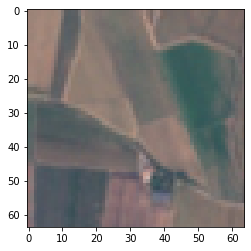

In [87]:
plt.imshow(training[2][0][65])

In [4]:
#Unused old block 
X=[]
y=[]

In [6]:
#Unused old block 
files = glob.glob("data/Highway/*.jpg")
for file in files:
    img = np.asarray(Image.open(file))
    X.append(img)
    y.append('Highway')

In [7]:
#Unused old block 
X=np.asarray(X)

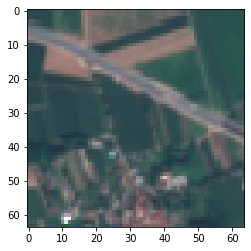

In [10]:
#Unused old block 
plt.imshow(X[4567].reshape(64, 64,3),cmap='Greens')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [15]:
le.classes_

array(['Forest', 'Highway'], dtype='<U7')

In [79]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(64, 64, 3)))
cnn_model.add(Conv2D(filters = 6,            
                     kernel_size = 3,       
                     activation='relu'),
                    
             )
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,
                     
                     kernel_size=2,
                     activation='relu'),
                
             )
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(len(training.class_indices), activation='softmax'))

In [80]:

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
callbacks = [
    EarlyStopping(patience=10, verbose=1, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-best.h5', verbose=1, save_best_only=True, monitor='val_accuracy')
]

In [88]:
history = cnn_model.fit_generator( generator=training, 
                    validation_data=validation,
                    callbacks=callbacks,    
                    epochs=15,
                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 16 steps
Epoch 1/15
89/90 [============================>.] - ETA: 0s - loss: 1.1128 - accuracy: 0.5946
Epoch 00001: val_loss improved from inf to 1.00606, saving model to model-best.h5
90/90 [==============================] - 30s 335ms/step - loss: 1.1113 - accuracy: 0.5953 - val_loss: 1.0061 - val_accuracy: 0.6556
Epoch 2/15
89/90 [============================>.] - ETA: 0s - loss: 0.9432 - accuracy: 0.6707
Epoch 00002: val_loss improved from 1.00606 to 0.92023, saving model to model-best.h5
90/90 [==============================] - 29s 325ms/step - loss: 0.9410 - accuracy: 0.6715 - val_loss: 0.9202 - val_accuracy: 0.6689
Epoch 3/15
89/90 [============================>.] - ETA: 0s - loss: 0.8369 - accuracy: 0.7062
Epoch 00003: val_loss improved from 0.92023 to 0.86918, saving model to model-best.h5
90/90 [==============================] - 28s 314ms/step - loss: 0.8374 - accuracy: 0.7064 - val_loss: 0.8692

In [92]:
history = cnn_model.fit_generator( generator=training, 
                    validation_data=validation,
                    callbacks=callbacks,    
                    epochs=35,
                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 16 steps
Epoch 1/35
89/90 [============================>.] - ETA: 0s - loss: 0.5159 - accuracy: 0.8206
Epoch 00001: val_loss did not improve from 0.59321
90/90 [==============================] - 33s 362ms/step - loss: 0.5160 - accuracy: 0.8203 - val_loss: 0.6013 - val_accuracy: 0.7931
Epoch 2/35
89/90 [============================>.] - ETA: 0s - loss: 0.5154 - accuracy: 0.8189
Epoch 00002: val_loss did not improve from 0.59321
90/90 [==============================] - 29s 325ms/step - loss: 0.5155 - accuracy: 0.8188 - val_loss: 0.6189 - val_accuracy: 0.7837
Epoch 3/35
89/90 [============================>.] - ETA: 0s - loss: 0.4904 - accuracy: 0.8277
Epoch 00003: val_loss did not improve from 0.59321
90/90 [==============================] - 32s 360ms/step - loss: 0.4904 - accuracy: 0.8279 - val_loss: 0.5960 - val_accuracy: 0.7956
Epoch 4/35
89/90 [============================>.] - ETA: 0s - loss: 0.4893 - 

Epoch 29/35
89/90 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9311
Epoch 00029: val_loss improved from 0.51708 to 0.50908, saving model to model-best.h5
90/90 [==============================] - 28s 306ms/step - loss: 0.2313 - accuracy: 0.9308 - val_loss: 0.5091 - val_accuracy: 0.8316
Epoch 30/35
89/90 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9338
Epoch 00030: val_loss improved from 0.50908 to 0.50687, saving model to model-best.h5
90/90 [==============================] - 28s 308ms/step - loss: 0.2281 - accuracy: 0.9336 - val_loss: 0.5069 - val_accuracy: 0.8323
Epoch 31/35
89/90 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9328
Epoch 00031: val_loss did not improve from 0.50687
90/90 [==============================] - 27s 304ms/step - loss: 0.2272 - accuracy: 0.9328 - val_loss: 0.5073 - val_accuracy: 0.8294
Epoch 32/35
89/90 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9349
E

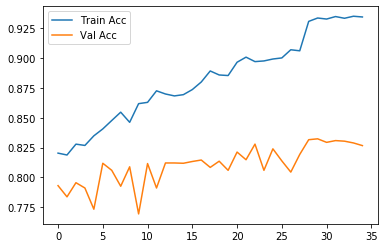

In [93]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],  label='Val Acc')
plt.legend()

In [94]:
img = Image.open('try.png')

In [95]:
img =img.convert('RGB')

In [96]:
img_temp=img.resize((64,64))

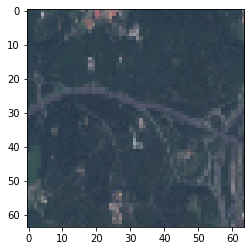

In [97]:
plt.imshow(img_temp)

In [98]:
img=np.asarray(img_temp)
img=img.reshape(1, 64,64,3)

In [111]:
cnn_model.predict_classes(img)

array([4])